In [58]:
using BoundaryValueDiffEq
using LaTeXStrings
using Statistics
using Plots

In [59]:
t = LinRange(0, 5, 1000);
tspan = (0.0, 5.0)
function prob3!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    dv[2] = (t^2 - du - u*t)/u
end

prob3! (generic function with 1 method)

In [60]:
v0 = [-0.1^3-9*0.1*log(0.1), 0]

function bc!(residual, v, p, t)
    # v[0] is the solution at the left boundary
    residual[1] = v[begin][1] + 1     # Dirichlet: u(0) = -1
    residual[2] = v[begin][2] - 0   # Neumann: u'(0) = 0
end

bc! (generic function with 1 method)

In [61]:
bvp1 = BVProblem(prob3!, bc!, v0, tspan)
sol = solve(bvp1, MIRK4(), dt = 0.01);
sol_interp = [s[1] for s in sol.(t)];

OneTerm(t) = -t^3/6;
TwoTerm(t) = -t^3/6 - 9*t*log(t);
# ThreeTerm(t) = -t^3/6 - 9*t*log(t);

In [62]:
# Compute the difference between numerical and approximate solutions
function difference(f, g)
    v = f .- g
    cleanv = filter(!isnan, v)
    return v, cleanv
end

# Compute error metrics
Diff1, Diff1clean = difference(sol_interp, OneTerm.(t))
max_error1 = maximum(abs.(Diff1clean))
mean_error1 = mean(abs.(Diff1clean))
println("One-term approximation results")
println("Maximum absolute error: ", max_error1)
println("Mean absolute error: ", mean_error1, "\n")

println("Two-term approximation results")
Diff2, Diff2clean = difference(sol_interp, TwoTerm.(t))
max_error2 = maximum(abs.(Diff2clean))
mean_error2 = mean(abs.(Diff2clean))
println("Maximum absolute error: ", max_error2)
println("Mean absolute error: ", mean_error2)

One-term approximation results
Maximum absolute error: 18.359191703938404
Mean absolute error: 6.196781950317875

Two-term approximation results
Maximum absolute error: 54.06551435559611
Mean absolute error: 20.136791719597912


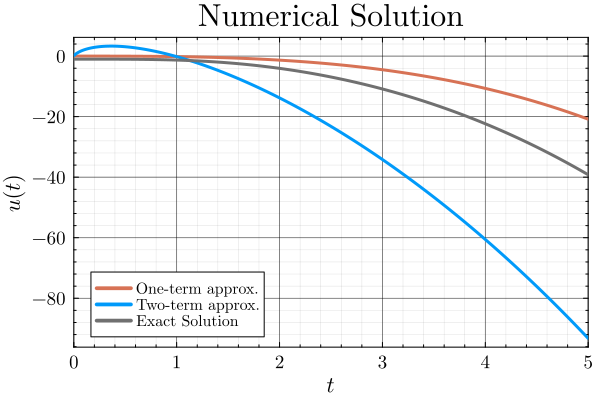

In [63]:
theme(:dao::Symbol)

plot(t, OneTerm.(t),
    line=(3, :solid),
    label="One-term approx.")
plot!(t, TwoTerm.(t),
    line=(3, :solid),
    label="Two-term approx.")
#=
plot!(t, ThreeTerm.(t),
    line=(3, :solid),
    label="Two-term approx.")
=#
plot!(sol,
    idxs=[1],
    line=(3, :solid),
    label="Exact Solution",
    title="Numerical Solution",
    legend=:best,
    xlabel=L"$t$",
    ylabel=L"$u(t)$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    )
# savefig("Aero_Exam1_Prob3_compare.pdf")

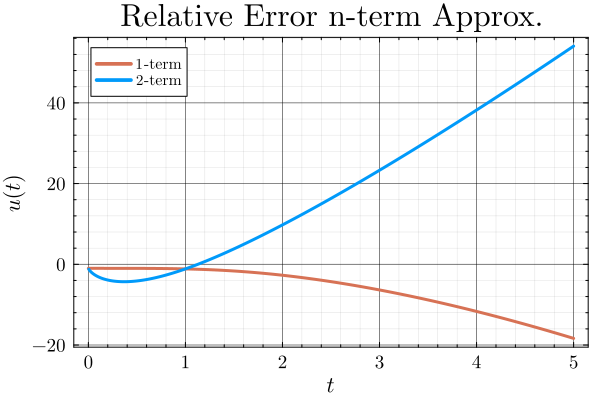

In [66]:
plot(t, [Diff1, Diff2],
    line=(3, :solid),
    labels=[L"1"*"-term" L"2"*"-term"],
    title="Relative Error n-term Approx.",
    legend=:best,
    xlabel=L"$t$",
    ylabel=L"$u(t)$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    )